# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *R*

**Names:**

* *Raphaël Barman*
* *Raphael Strebel*
* *Thierry Bossy*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [85]:
# Setup
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# We disable the mumpy exception messages to have cleaner figures
np.seterr(all='ignore');

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [106]:
# Graph loading
with open('../data/network1.csv') as f:
    lines = f.readlines()
edges = [line.strip().split(',') for line in lines if not line.startswith('#')]
graph = nx.Graph()
graph.add_edges_from(edges)
print("Number of nodes:", nx.number_of_nodes(graph))
print("Number of edges:", nx.number_of_edges(graph))

Number of nodes: 13033
Number of edges: 18584


#### Exercise 2.2:  Node degree distribution

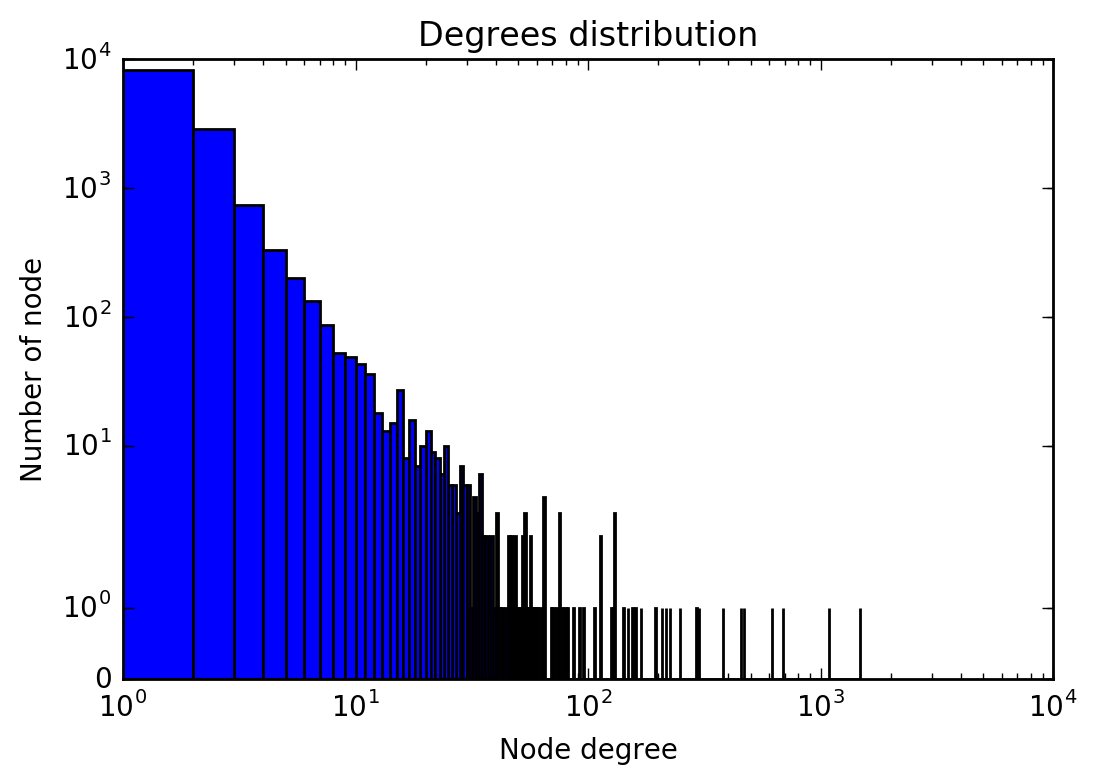

Maximum degree is 1482


In [107]:
degrees = list(nx.degree(graph).values())
plt.hist(degrees, bins=np.arange(0,max(degrees)+1,1));
plt.title('Degrees distribution')
plt.xscale('log') 
plt.yscale('symlog')
plt.xlabel("Node degree")
plt.ylabel("Number of node")
plt.show()
print('Maximum degree is',max(degrees))

1. Since the data is spread out, a loglog plot seemed the most obvious choice, the histogram plot helps to see the general shape of the distribution.
2. Most of the nodes are of degree ten or less, however there are a few nodes that have very high degrees.
3. It looks like a power law distribution, which is a straight line in a loglog plot. Its $\alpha$ should be quite small, since the slope isn't very strong.

#### Exercise 2.3: Giant component

In [55]:
print("Number of connected components:", nx.number_connected_components(graph))
giant_component = max(nx.connected_component_subgraphs(graph), key=nx.number_of_nodes)
print("Number of nodes in the biggest connected components:", nx.number_of_nodes(giant_component))
print("Ratio: %.2f"% (nx.number_of_nodes(giant_component)/nx.number_of_nodes(graph)*100), "%")

Number of connected components: 192
Number of nodes in the biggest connected components: 12576
Ratio: 96.49 %


The biggest connected component clearly is a giant component, since it contains more than 95% of nodes of the graph.

#### Exercise 2.4: Short paths & Small-worlds

In [46]:
# Computes a list of the distances between each pair given all the pair of shortest paths.
# We only count once each pair (i.e. A->C and C->A is counted only once).
def compute_list_of_distances(shortest_paths):
    distance_list = {}
    for node, neighbors in shortest_paths.items():
        for neighbor, distance in neighbors.items():
            if neighbor != node and not (neighbor,node) in distance_list:
                distance_list[(node,neighbor)] = distance
    return distance_list = list(distance_list.values())

In [185]:
# Computes the average number of nodes at a certain distance
def average_nodes_at_dist(shortest_paths, dist):
    res = 0.0
    for neighbors in shortest_paths.values():
        for distance in neighbors.values():
            if(distance <= dist):
                res += 1
    return res/len(shortest_paths)


# Vectorized version of previous function for convenience
# (not efficient at all, essentially a for loop) 
average_nodes_at_dists = np.vectorize(average_nodes_at_dist)

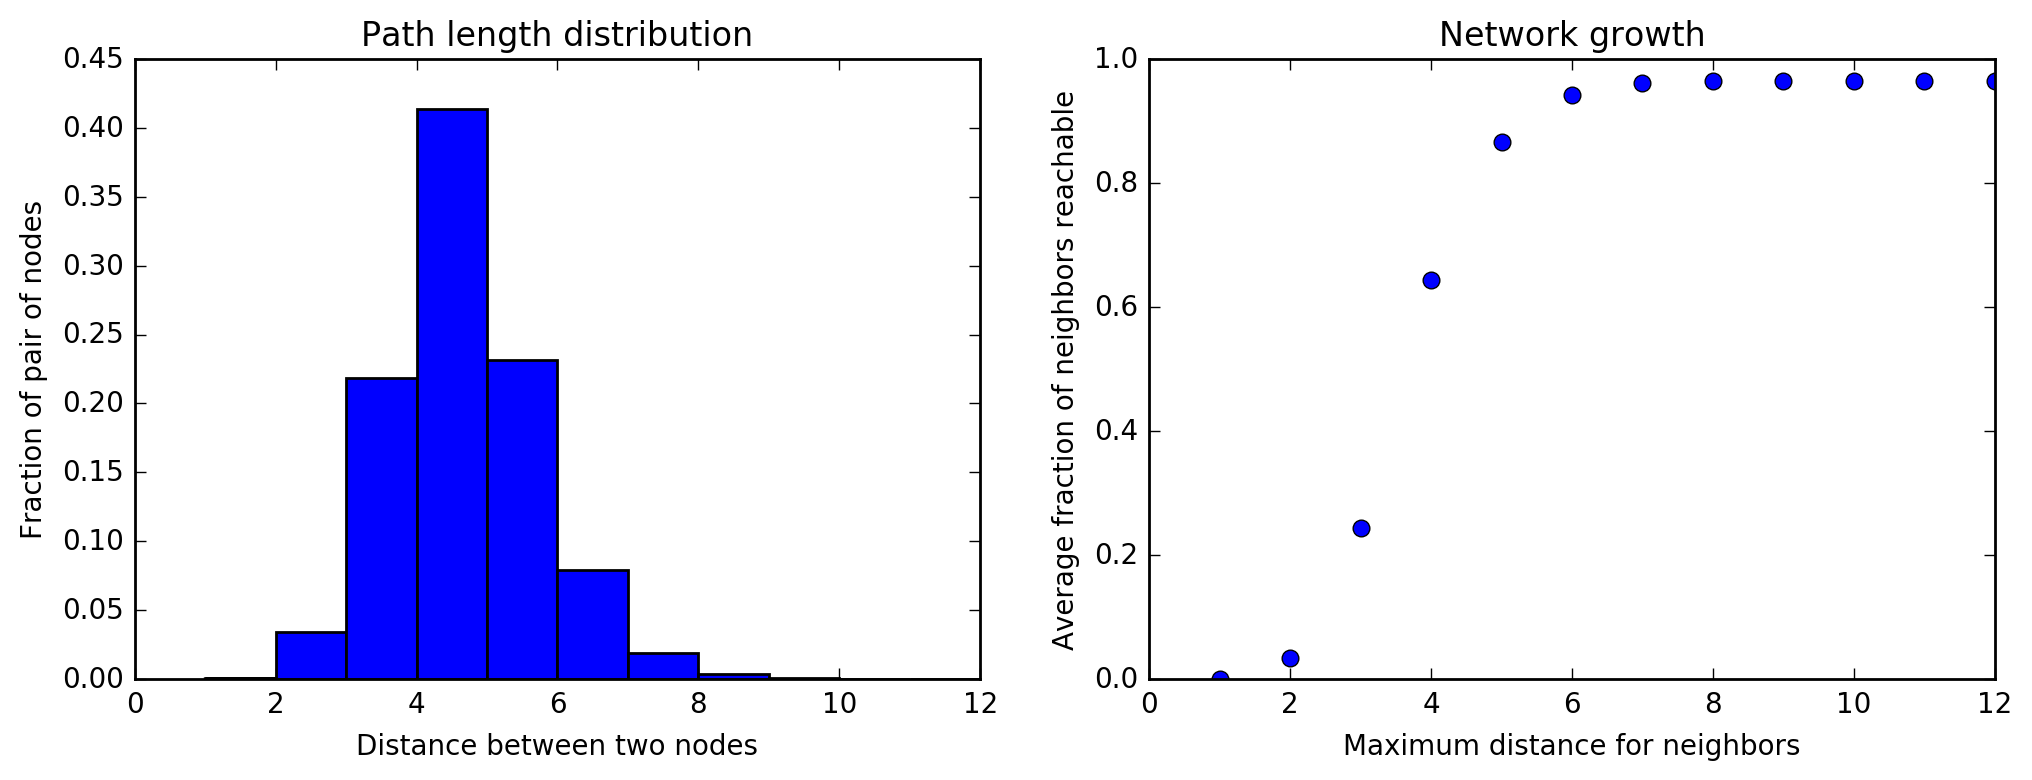

In [88]:
fig, axes = plt.subplots(1,2,figsize=(12.0,4.0))


# We compute all the shortest paths between all pair of vertices
shortest_paths = nx.all_pairs_shortest_path_length(giant_component)
distance_list = compute_list_of_distances(shortest_paths)

ax = axes[0]
ax.set_title('Path length distribution')
ax.hist(distance_list,bins=np.arange(1,max(distance_list)+1,1),normed=True)
ax.set_xlabel("Distance between two nodes")
ax.set_ylabel("Fraction of pair of nodes")

# We compute the average distance until 12 (to see the general
# evolution until double the small world distance)
# and we normalize it
distances = np.arange(1,13,1)
average_nodes = average_nodes_at_dists(shortest_paths,distances)/nx.number_of_nodes(graph)

ax = axes[1]
ax.set_title('Network growth')
ax.plot(distances,average_nodes,'o')
ax.set_xlabel("Maximum distance for neighbors")
ax.set_ylabel("Average fraction of neighbors reachable")
plt.show()

In [10]:
#average (shortest path) length between pair of vertices
print(nx.average_shortest_path_length(giant_component))

4.175488076629283


We can say that this graph is a small-world.
- The average shortest path is of 4.175.
- From the histogram, we see that most of the distance between two nodes are 6 or less.
- From the last graph, we can see that most of the nodes are reachable with a distance of 6.

#### Exercise 2.5: Network comparison

In [111]:
with open('../data/network2.csv') as f:
    lines = f.readlines()
edges = [line.strip().split(',') for line in lines if not line.startswith('#')]
graph = nx.Graph()
graph.add_edges_from(edges)
print("Number of nodes:", nx.number_of_nodes(graph))
print("Number of edges:", nx.number_of_edges(graph))

Number of nodes: 26542
Number of edges: 43516


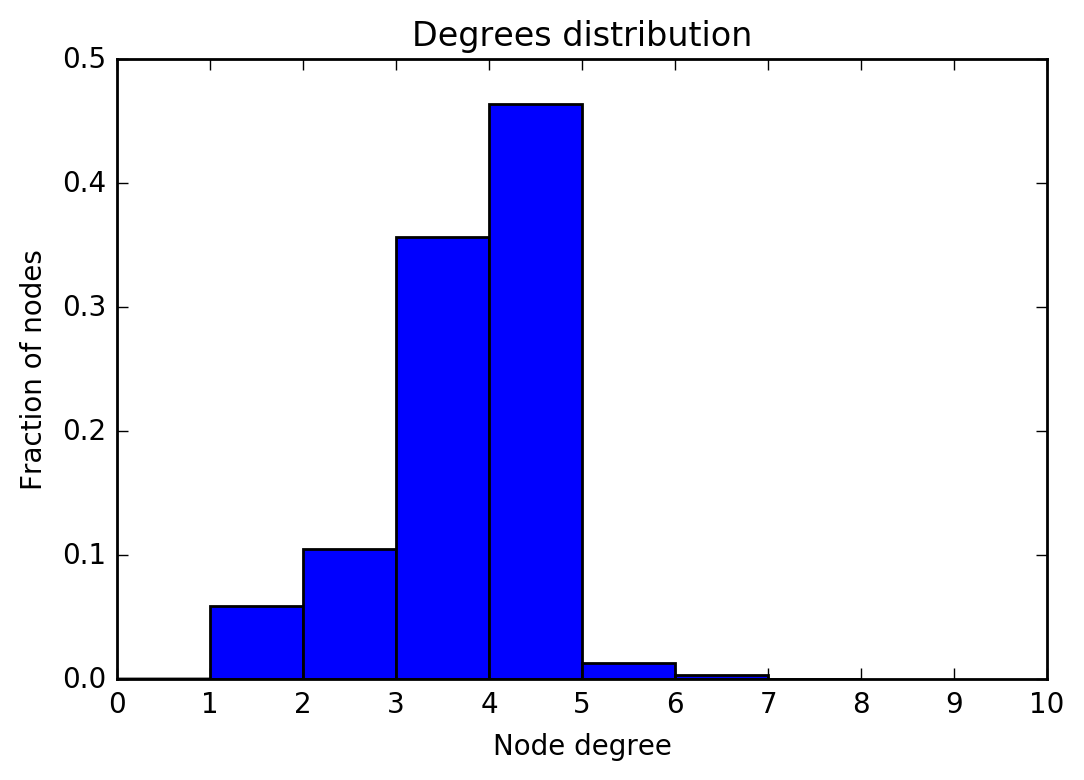

Maximum degree is 8


In [110]:
degrees = list(nx.degree(graph).values())
plt.hist(degrees, bins=np.arange(0,max(degrees)+1,1),normed=True);
plt.title('Degrees distribution')
plt.xticks(np.arange(0,11,1))
plt.xlabel("Node degree")
plt.ylabel("Fraction of nodes")
plt.show()
print('Maximum degree is',max(degrees))

The degree distribution is very different from the first graph, it is much more packed (no need for a loglog plot this time).

Also it doesn't follow a power law this time, it looks more like a skewed normal distribution.

In [94]:
print("Number of connected components:", nx.number_connected_components(graph))
giant_component = max(nx.connected_component_subgraphs(graph), key=nx.number_of_nodes)
print("Number of nodes of the biggest connected components:", nx.number_of_nodes(giant_component))
print("Ratio: %.2f"% (nx.number_of_nodes(giant_component)/nx.number_of_nodes(graph)*100), "%")

Number of connected components: 5
Number of nodes of the biggest connected components: 26481
Ratio: 99.77 %


We can see that there is one giant component that includes almost all the network (except for 4 small connected components) whereas the first network had a greater amount of smaller connected components.

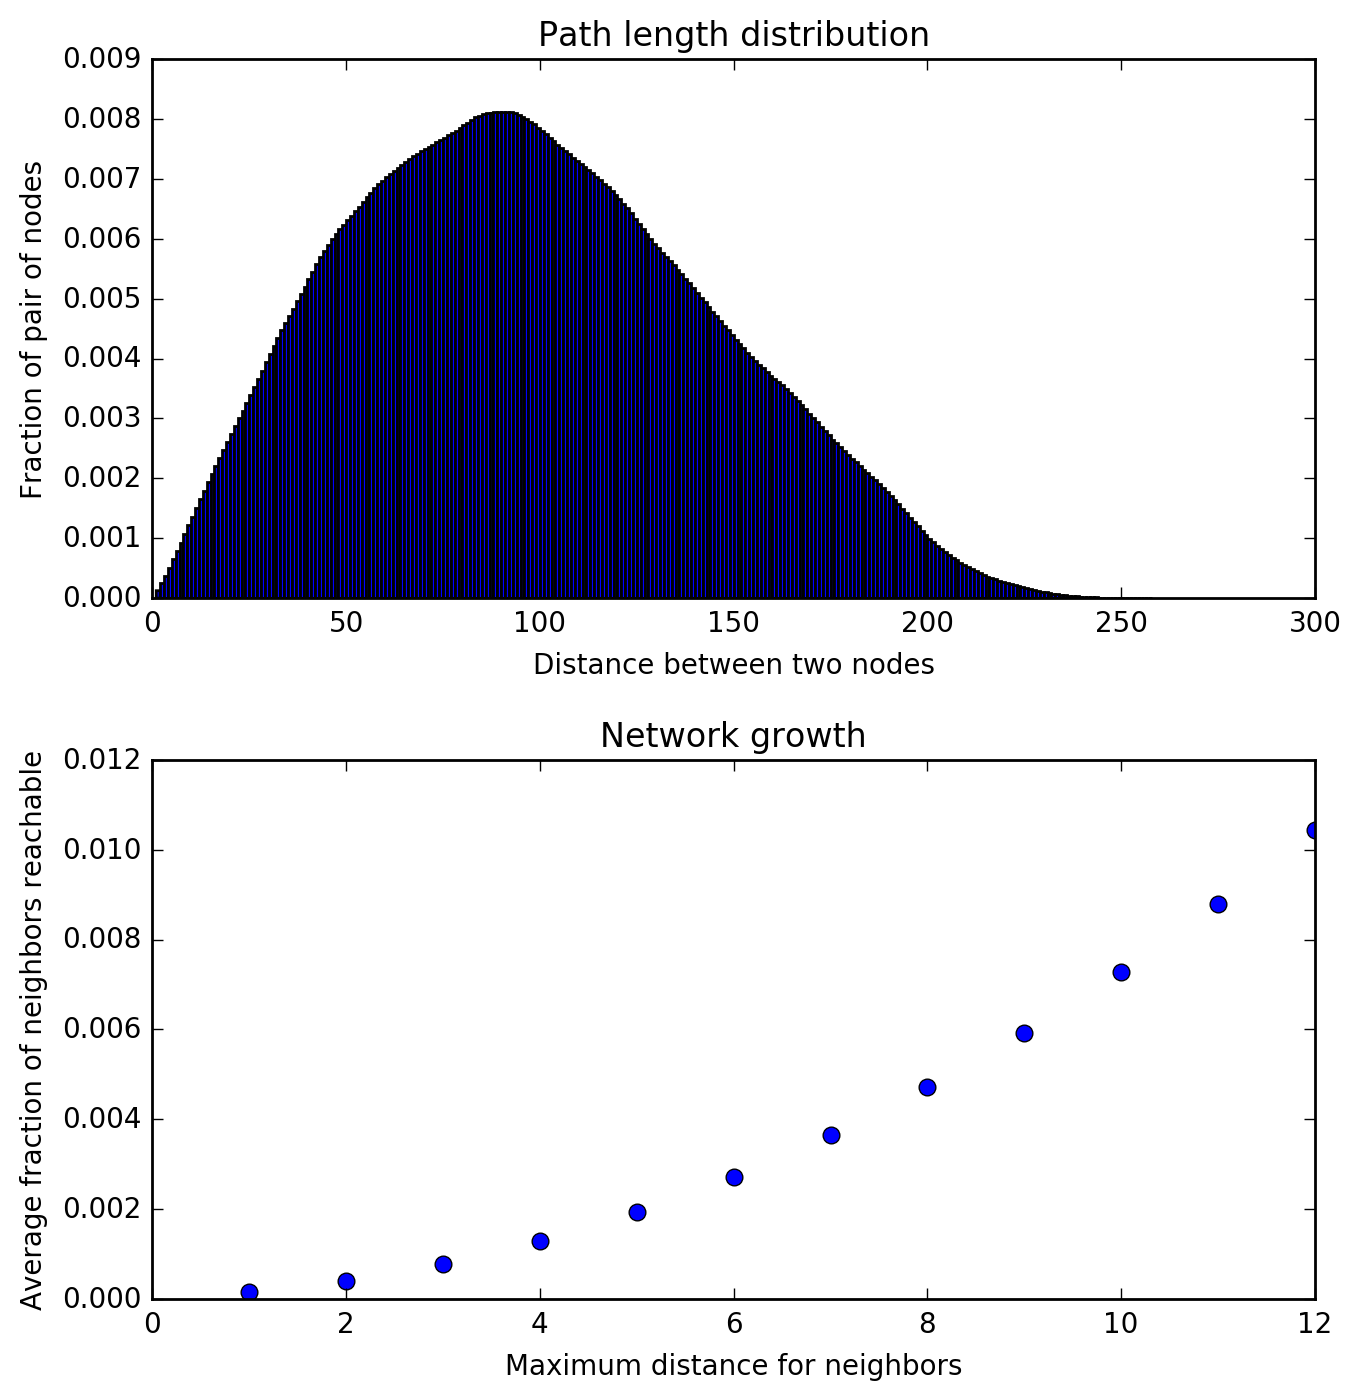

In [105]:
fig, axes = plt.subplots(2,1,figsize=(7.5,8.0))
fig.subplots_adjust(hspace=.3)


# We compute all the shortest paths between all pair of vertices
shortest_paths = nx.all_pairs_shortest_path_length(giant_component)
distance_list = compute_list_of_distances(shortest_paths)

ax = axes[0]
ax.set_title('Path length distribution')
ax.hist(distance_list,bins=np.arange(1,max(distance_list)+1,1),normed=True)
ax.set_xlabel("Distance between two nodes")
ax.set_ylabel("Fraction of pair of nodes")

# We compute the average distance until 12 (to see the general
# evolution until double the small world distance)
# and we normalize it
distances = np.arange(1,13,1)
average_nodes = average_nodes_at_dists(shortest_paths,distances)/nx.number_of_nodes(graph)

ax = axes[1]
ax.set_title('Network growth')
ax.plot(distances,average_nodes,'o')
ax.set_xlabel("Maximum distance for neighbors")
ax.set_ylabel("Average fraction of neighbors reachable")
plt.show()

In [37]:
print(nx.average_shortest_path_length(giant_component))

97.55708682597601


This time, the graph is definitely not a small world.
- The average shortest path is of 97.56, which is very far from 6.
- From the histogram, we see that most of the distance between two nodes is very spread out a very small fraction of nodes are reachable in less than 6 steps.
- From the last graph, we can see that average fraction of nodes reachable from even a distance of 12 stays quite small.

#### Exercise 2.6: Network identification

The first is the subgraph of routers comprising the Internet because there are nodes with very high degrees, those would be backbone routers and a road with this much intersection is not really imaginable. Also, the fact that it is a small world makes it more likely to be a routeur network, since a high inter-connectivity is needed for fast transfer.

The second is the road network of New York because all roads are connected (except for rare exceptions) to the main roads. Also the fact that there is at most a degree of 8 make it more likely to be road intersection. Finally the fact that every intersection is not at a small distance of another one makes sense, since two intersection could be physically very far one from the other.